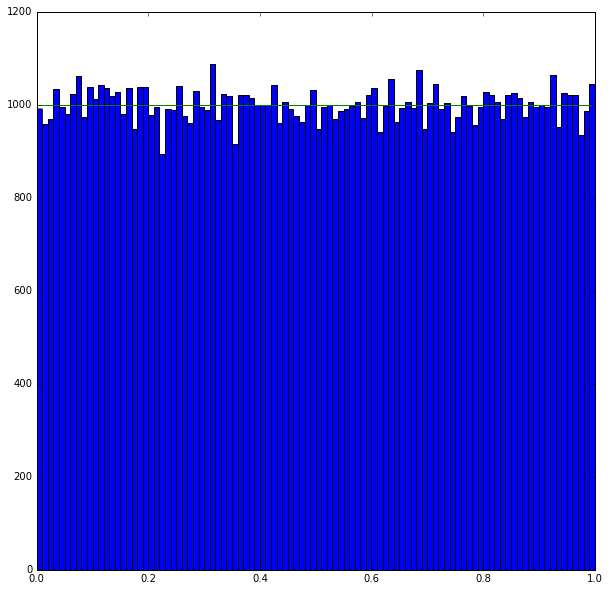

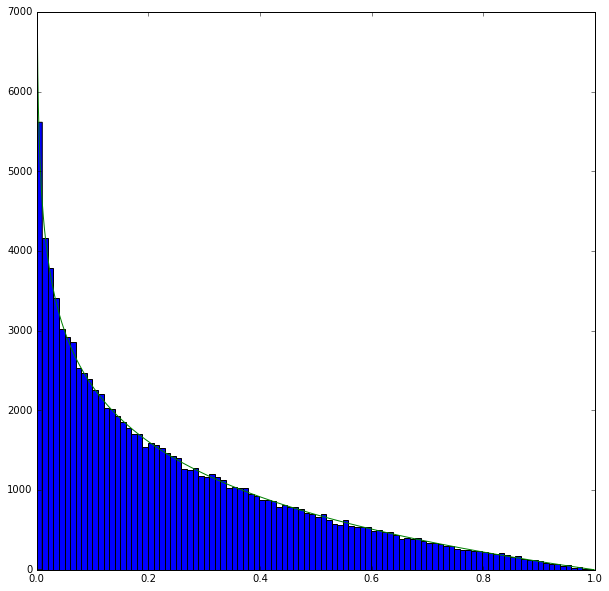

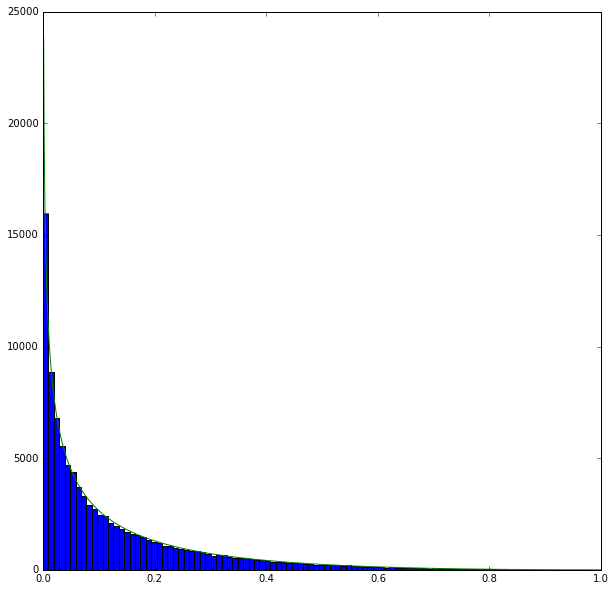

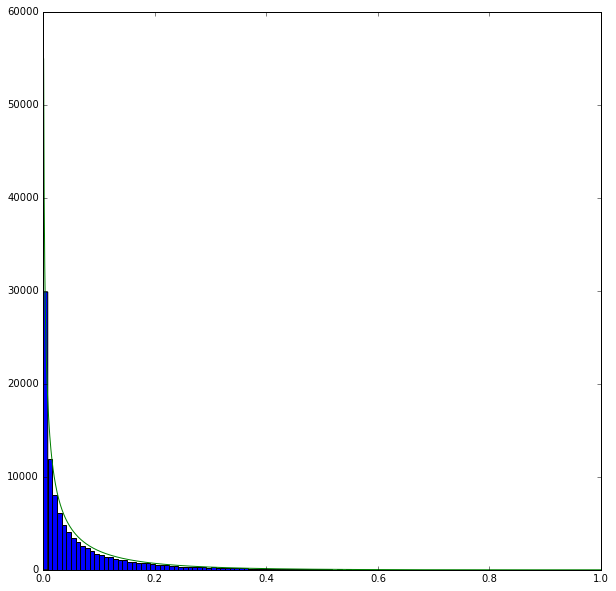

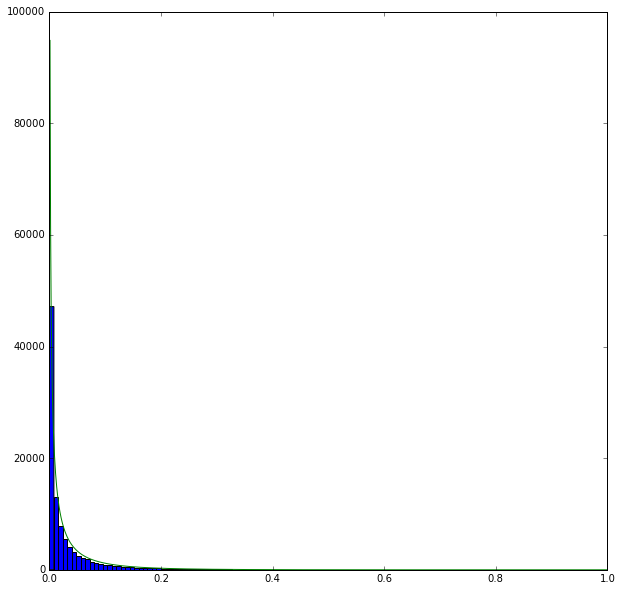

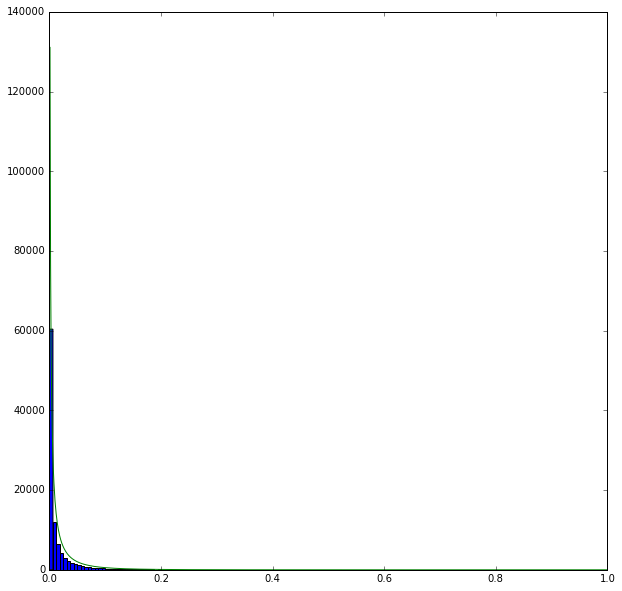

In [8]:
import random
import math
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import sys
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

points = 100000
binNo = 100

X = [random.uniform(0,1) for i in range(points)]
Y = [random.uniform(0,1) for i in range(points)]
Z = [random.uniform(0,1) for i in range(points)]
W = [random.uniform(0,1) for i in range(points)]
V = [random.uniform(0,1) for i in range(points)]
U = [random.uniform(0,1) for i in range(points)]

fig1 = plt.figure()
plt.hist(X, bins=binNo)
plt.plot([0, 1], 2*[points/binNo])

fig1.savefig("prodDist1.png")
fig2 = plt.figure()
plt.hist([x * y for x, y in zip(X, Y)], bins=binNo)


pointNo = 1000

logPoints = [float(i)/pointNo for i in range(1, pointNo)]



logValues2 = [(points/binNo * (-1)) * math.log(i) for i in logPoints]
plt.plot(logPoints, logValues2)

fig2.savefig("prodDist2.png")
fig3 = plt.figure()

plt.hist([x * y * z for x, y, z in zip(X, Y, Z)], bins=binNo)

logValues3 = [(points/binNo) * (math.log(i)**2)/2 for i in logPoints]
plt.plot(logPoints, logValues3)

fig3.savefig("prodDist3.png")
fig4 = plt.figure()

plt.hist([x * y * z * w for x, y, z, w in zip(X, Y, Z, W)], bins=binNo)

logValues3 = [(points/binNo) * (math.log(i)**3)/(-6) for i in logPoints]
plt.plot(logPoints, logValues3)

fig4.savefig("prodDist4.png")
fig5 = plt.figure()

plt.hist([x * y * z * w * v for x, y, z, w, v in zip(X, Y, Z, W, V)], bins=binNo)

logValues3 = [(points/binNo) * (math.log(i)**4)/(24) for i in logPoints]
plt.plot(logPoints, logValues3)

fig5.savefig("prodDist5.png")
fig6 = plt.figure()

plt.hist([x * y * z * w * v * u for x, y, z, w, v, u in zip(X, Y, Z, W, V, U)], bins=binNo)

logValues3 = [(points/binNo) * (math.log(i)**5)/(-120) for i in logPoints]
x =plt.plot(logPoints, logValues3)


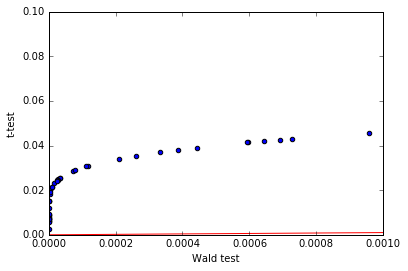

In [7]:
import random
import math
import collections
import scipy.stats
import scipy.stats.distributions as distributions
import numpy as np
import sys
from pylab import rcParams
import matplotlib.pyplot as plt

%matplotlib inline

LinregressResult = collections.namedtuple("LinregressResult", ["slope", "intercept", "rvalue", "pvalue", "stderr"])

def compareLinRegress():
    # Draw some random X and Y
    sampleSize = 5
    X = [random.uniform(0, 1) for i in range(sampleSize)]
    Y = [random.uniform(0, 1) for i in range(sampleSize)]

    # Compute their average
    avgX = sum(X)/sampleSize
    avgY = sum(Y)/sampleSize

    # Partial steps to compute estimators of linear regression parameters.
    XDiff = [X_i - avgX for X_i in X]
    XDiffSquared = [i*i for i in XDiff]
    YDiff = [Y_i - avgY for Y_i in Y]

    # B1 is the estimator of slope.
    # B0 is the estimator of intercept.
    # r is the estimator of Y given X.
    B1 = sum(x * y for x, y in zip(XDiff, YDiff)) / sum(XDiffSquared)
    B0 = avgY - B1*avgX
    r = lambda x: B0 + B1*x

    # Partial steps to compute Wald Statistic.
    errs = [y - r(x) for x, y in zip(X, Y)]
    errStd = math.sqrt((1/(sampleSize-2))*(sum([err**2 for err in errs])))
    XStd = math.sqrt((1/(sampleSize))*sum([diff**2 for diff in XDiff]))
    stdB1 = errStd / (XStd * math.sqrt(sampleSize))

    # Wald Statistic.
    W = (B1 - 0)/stdB1

    # pvalue of Wald Test of B1 = 0.
    pvalueWald = 2*scipy.stats.norm.cdf(-abs(W))

    # pvalue of T test of B1 = 0.
    pvalueT = 2*distributions.t.sf(abs(W), sampleSize - 2)

    resultWald = LinregressResult(slope=B1, intercept=B0, rvalue=None, pvalue=pvalueWald, stderr=stdB1)
    resultT = LinregressResult(slope=B1, intercept=B0, rvalue=None, pvalue=pvalueT, stderr=stdB1)
    return resultWald, resultT

totalRuns = 1000

linregress = [compareLinRegress() for i in range(totalRuns)]
waldPValues = [resultWald.pvalue for resultWald, resultT in linregress]
TPValues = [resultT.pvalue for resultWald, resultT in linregress]

f = plt.figure()
ax = f.add_subplot(111)

plt.scatter(waldPValues, TPValues)
plt.plot([0,1], [0,1], 'r-')

ax.set_xlabel("Wald test")
ax.set_ylabel("t-test")
plt.ylim([0,0.1])
plt.xlim([0,0.001])

plt.show()
f.savefig("WaldVsT.png")

In [1]:
import scipy.stats
import random

# Draw some random X and Y
sampleSize = 5
X = [random.uniform(0, 1) for i in range(sampleSize)]
Y = [random.uniform(0, 1) for i in range(sampleSize)]

# named tuple for scipy's linear regression
resultScipy = scipy.stats.linregress(X, Y)

print(resultScipy)

LinregressResult(slope=-0.36654925096390012, intercept=0.67985896267369861, rvalue=-0.32357812225448918, pvalue=0.59531436421063166, stderr=0.61883685654551934)


In [102]:
import scipy.integrate as integrate
import math

def pdf(x, n):
    return ((-1 * math.log(x)) ** (n - 1)) / math.factorial(n - 1)

def cdf(x, n):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
    else:
        return integrate.quad(lambda x: pdf(x, n), 0, x)[0]

#r=100000
#maxn=8
#lookup = [[cdf(i/r, n) for i in range(r)] for n in range(1, maxn + 2)]

cdf(0.1, 2)

0.3302585092994047